# Wine classification 

This dataset seeks to produce a machine learning model which can accurately predict the wine type: white or red, based upon common characteristics.

## Loading Dataset

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils.class_weight import compute_class_weight

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

In [2]:
wine = pd.read_csv("C:\\Users\\quinn\\OneDrive\\Documents\\Projects\\Datasets\\Wine\\wine_quality_merged.csv")

**Evaluating dataset**

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
# Checking for missing values
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [5]:
# Checking class balance of red and whites
values = wine['type'].value_counts()
values

type
white    4898
red      1599
Name: count, dtype: int64

In [6]:
# Computing class weights
compute_class_weight(class_weight = "balanced", classes = np.unique(wine['type']), y = wine['type'])

array([2.03158224, 0.66322989])

We can observe that there is a significantly larger presence of white wines than red wines present within the dataset.

This class imbalance needs to be dealt with appropriately using class weighting.

Text(0, 0.5, 'Count')

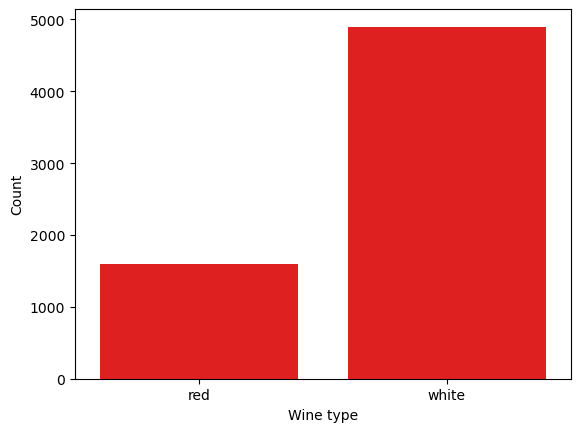

In [7]:
sns.countplot(data = wine, x = 'type', color = 'red')
plt.xlabel('Wine type')
plt.ylabel('Count')

**We should use label encoding for the type label so that machine learning can be applied**

In [8]:
wine2 = wine.copy() # Using a duplicate data frame so the original is maintained.

In [9]:
le = LabelEncoder()
# Red : 0
# White : 1
wine2['type'] = le.fit_transform(wine2['type'])
wine2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


# Checking for multicollinearity of attributes using a correlation matrix

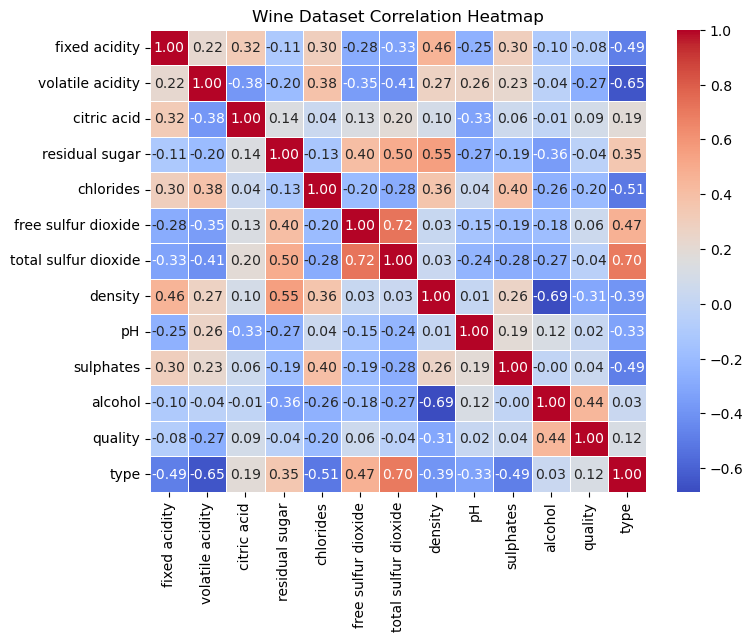

In [10]:
matrix = wine2.corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Wine Dataset Correlation Heatmap")
plt.show()

* As we can observe, the only variables which demonstrate some level of positive correlation are *'type'* - *'total sulfur dioxide'* (0.70) and *'free sulfure dioxide'* - *'total sulfure dioxide'* (0.72).

# Classifying using Random Forest 

In [11]:
X = wine2.drop('type', axis = 1)
y = wine2['type']

# Data split of 60% training, 40% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [12]:
# Applying classifier
rf = RandomForestClassifier(class_weight = "balanced" ) #balance parameter will correct the class imbalance present.
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

**Assessing**

In [13]:
y_pred = rf.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9946133128126202


Extremely high accuracy indicates the random forest classifier performs well.

**Visualising**

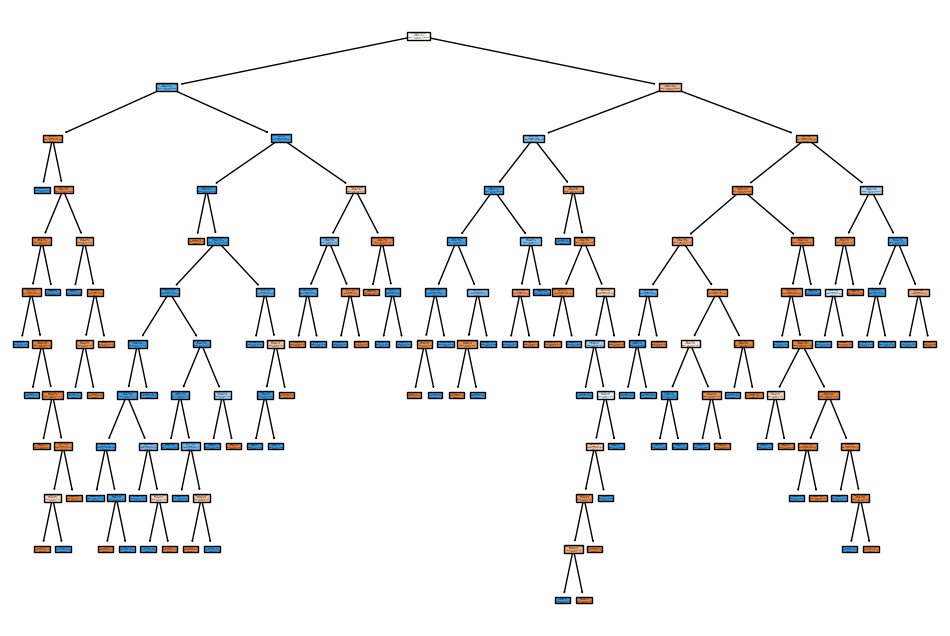

In [29]:
target = 'type' # target attribute (type of wine)
feature_names = wine2.drop(target, axis=1).columns # names of columns in wine2 besides wine type
class_names = wine2[target].unique().astype(str) # How many classes exist in the type attribute

individual_tree = rf.estimators_[6] # first tree, index of 0.

plt.figure(figsize=(12, 8))
plot_tree(individual_tree, feature_names=feature_names, class_names = class_names, filled=True)
plt.show()